In [2]:
#                    Chem 210B  C.W. McCurdy
"""
                          Spring 2020
     
     Starter for Rotational Wave Packet problem showing revivals in <cos^2 theta >

     Clebsch Gordan coefficients using SymPy implementation
     
     Uses the CG function to compute the numerical values of the Clebsch-Gordan
     coefficients

     This starter includes a function to compute the matrix element 
       <jm|cos^2(theta)|j'm'>

     And also a loop that computes a Poisson distribution

     The rest of the problem is to use this starter by adding the loops and logic
     that compute the expectation value of cos^2(theta) as a function of time, 
     called <cos^2(theta)>_t in part (d) of problem 1 on Problem Set 1.
    
"""
#
#preliminaries to invoke SymPy package and also plots using matplot
#%%
from sympy.physics.quantum.cg import CG   # import the Clebsch-Gordan function
import matplotlib.pyplot as plt 
import numpy as np
#&&
########################################################################
#
#Parameters of the model: Rotational constants for N2
#
B0 = 1.989581 
# B0 = 0.03737  Be for I2 from NIST tables
c = 2.99792*10**(10)
omega1 = 2*np.pi*2*B0*c
Tau = 2*np.pi/omega1
print("\n   Rigid rotor parameters")
print("B0 = ",B0," cm^-1")
print("omega1 = ",omega1,"   Tau = " , Tau," secs")
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')
#&&
#
#  function giving <jm|cos^2(theta)|j'm'>
#
def cos2theta(j,m,jp,mp):
   value=0
#   The triangle inequality would require only  np.abs(jp-2) <= j and j <= jp +2 
#   but evidently parity requires that j and jp must both be even or odd :
#   m = m' is required because the operator has no phi dependence
   if np.abs(jp-2) == j or j == jp +2 or j == jp and m == mp:
            cg1 =CG(2,0,jp,0,j,0)
            cgval1 = cg1.doit()
            cg2 =CG(2,0,jp,m,j,m)
            cgval2 = cg2.doit()
            value = (2/3)*np.sqrt((2*jp+1)/(2*j+1))*cgval1*cgval2
   add = 0
   if jp == j and m == mp:
       add = 1/3
   value = value + add
   return float(value)
#
# test function for <10,5|cos^theta|12,5>
#
test=cos2theta(10,5,12,5)
print("\n test cos^2 theta matrix element","\n<10,5|cos^theta|12,5> = ",test," should be 0.2028157181")
#&&


   Rigid rotor parameters
B0 =  1.989581  cm^-1
omega1 =  749534328704.5837    Tau =  8.382785239521694e-12  secs

 test cos^2 theta matrix element 
<10,5|cos^theta|12,5> =  0.20281571808157564  should be 0.2028157181


norm of probability distribution =  0.9999555975234603

 Running from console, close figure window to proceed and make .pdf file of figure


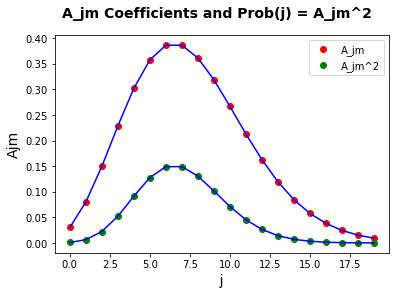


 Running from console, close figure window to proceed and make .pdf file of figure


In [3]:
#    A^2 for  1D
#
#


#  Amplitudes = square root of Poisson distribution 
#
j_pts = []
Ajm = []
Prob = []
a = 7 
jmax = 20 
norm = 0.0
for j in range(0,jmax):
    j_pts.append(j)
    Ajm.append(np.sqrt( (np.exp(-a)*a**j) /np.math.factorial(j)))
    Asquared =  (np.exp(-a)*a**j) /np.math.factorial(j) 
    Prob.append( Asquared )
    norm = norm + Asquared

print("norm of probability distribution = ",norm)


plt.suptitle('A_jm Coefficients and Prob(j) = A_jm^2', fontsize=14, fontweight='bold')
string="A_jm"
plt.plot(j_pts,Ajm,'ro',label=string)
plt.plot(j_pts,Ajm,'-b')
string="A_jm^2"
plt.plot(j_pts,Prob,'go',label=string)
plt.plot(j_pts,Prob,'-b')
plt.legend(loc="best")
plt.xlabel(" j ", fontsize=14)
plt.ylabel("Ajm", fontsize=14)
print("\n Running from console, close figure window to proceed and make .pdf file of figure")
#example how to set limits if necessary
#xmax = float(rmax)  # CWM: need to use float() to get plt.xlim to work to set x limits
#plt.xlim([0,xmax])
number_string = str(a)
plt.savefig('AJM_a='+number_string+'.pdf', transparent=False)
plt.show()
#
#&&
print("\n Running from console, close figure window to proceed and make .pdf file of figure")
#&&
#######################################################################
# exit()  uncomment when running from terminal directly
#######################################################################






####### figure 1 left






In [4]:
# for N2 1D           time max = 17.5    


# figure 1 right



B0 = 1.989581 
# B0 = 0.03737  Be for I2 from NIST tables
c = 2.99792*10**(10)
omega1 = 2*np.pi*2*B0*c
Tau = 2*np.pi/omega1

time = np.linspace(0,2*Tau,200)
total = []
for i in time:
    zero = 0
#    total.append(zero)
    for j in range(0,20):
        for k in range(0,20):
            zero += (Ajm[j]*Ajm[k]*np.exp(-1j*omega1*j*(j+1)*i/2)
                                    *np.exp(1j*omega1*k*(k+1)*i/2)*cos2theta(j,0,k,0))
    total.append(zero)

In [5]:
type(time)

numpy.ndarray

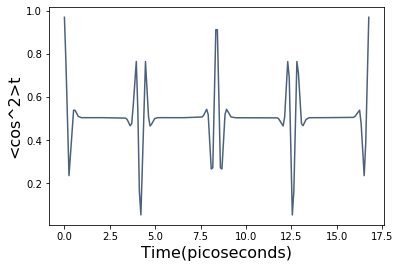

In [6]:
table = Table().with_columns("Time(picoseconds)",time*10e11,"<cos^2>t",np.real(total)).plot(0)


In [7]:
## I2      for 1e part2     a=7    B=0.03    Jmax = 20

I2 = 0.03737  
omegaI2 = 2*np.pi*2*I2*c
TauI2 = 2*np.pi/omegaI2

In [8]:
#2t
timeI2 = np.linspace(0,2*TauI2,200)

totalI2 = []
for i in timeI2:
    zeroI2 = 0
#    total.append(zero)
    for jI2 in range(0,20):
        for kI2 in range(0,20):
            zeroI2 += (Ajm[jI2]*Ajm[kI2]*np.exp(-1j*omegaI2*jI2*(jI2+1)*i/2)
                                    *np.exp(1j*omegaI2*kI2*(kI2+1)*i/2)*cos2theta(jI2,0,kI2,0))
    totalI2.append(zeroI2)

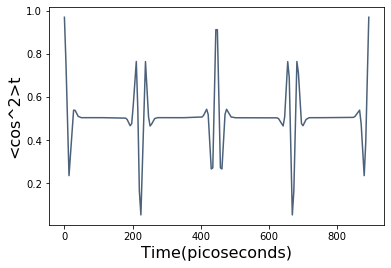

In [17]:
I2plot = Table().with_columns("Time(picoseconds)",timeI2*10e11,"<cos^2>t",np.real(totalI2)).plot(0)

In [10]:
# creating nuclear spin for the graph and code below

j_ptsspin = []
Ajmspin = []
Probspin = []
aspin = 14 
jmaxspin = 40 
normspin = 0.0
for jspin in range(0,jmaxspin):
    j_ptsspin.append(jspin)
    
    if(np.mod(jspin,2) != 0):
        
        Ajmspin.append(1/2*np.sqrt( (np.exp(-aspin)*aspin**jspin) /np.math.factorial(jspin)))
    
    else:
        Ajmspin.append(np.sqrt( (np.exp(-aspin)*aspin**jspin) /np.math.factorial(jspin)))
    
    if(np.mod(jspin,2) != 0):
        
        Asquaredspin = (1/2*(np.exp(-aspin)*aspin**jspin)) /np.math.factorial(jspin) 
    
    else:
        Asquaredspin =  (np.exp(-aspin)*aspin**jspin) /np.math.factorial(jspin) 

    
    Probspin.append( Asquaredspin )
    normspin = normspin + Asquaredspin

In [11]:
# 1 e part 3    using a=j where j=14 so jmax = 40
# includes spin 


j_pts3 = []
Ajm3 = []
Prob3 = []
a3 = 14 
jmax3 = 40 
norm3 = 0.0
for j3 in range(0,jmax3):
    j_pts3.append(j3)
    Ajm3.append(np.sqrt( (np.exp(-a3)*a3**j3) /np.math.factorial(j3)))
    Asquared3 =  (np.exp(-a3)*a3**j3) /np.math.factorial(j3) 
    Prob3.append( Asquared3 )
    norm3 = norm3 + Asquared3




B0e = 1.989581 
# B0 = 0.03737  Be for I2 from NIST tables
c = 2.99792*10**(10)
omega1e = 2*np.pi*2*B0e*c
Taue = 2*np.pi/omega1e

timee = np.linspace(0,1.1*Taue,200)
totale = []
for ie in timee:
    zeroe = 0
#    total.append(zero)
    for je in range(0,40):
        for ke in range(0,40):
            zeroe += (Ajmspin[je]*Ajmspin[ke]*np.exp(-1j*omega1e*je*(je+1)*ie/2)
                                    *np.exp(1j*omega1e*ke*(ke+1)*ie/2)*cos2theta(je,0,ke,0))
    totale.append(zeroe)

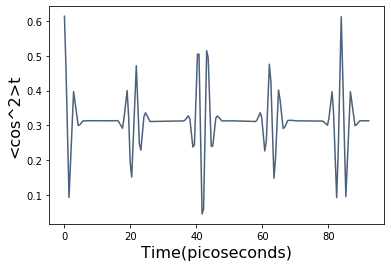

In [12]:
#1e part 3 includes spin
table = Table().with_columns("Time(picoseconds)",timee*10e12,"<cos^2>t",np.real(totale)).plot(0)

In [13]:
# e part4

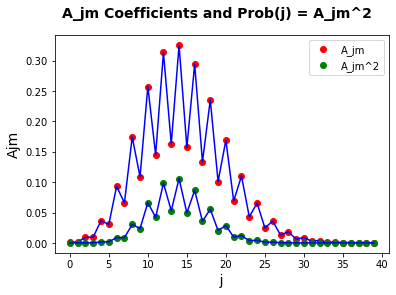

In [14]:
# a=14
plt.suptitle('A_jm Coefficients and Prob(j) = A_jm^2', fontsize=14, fontweight='bold')
string="A_jm"
plt.plot(j_ptsspin,Ajmspin,'ro',label=string)
plt.plot(j_ptsspin,Ajmspin,'-b')
string="A_jm^2"
plt.plot(j_ptsspin,Probspin,'go',label=string)
plt.plot(j_ptsspin,Probspin,'-b')
plt.legend(loc="best")
plt.xlabel(" j ", fontsize=14)
plt.ylabel("Ajm", fontsize=14)
plt.show()

In [15]:
# 1e part 4 
# a=14
timespin = np.linspace(0,Tau,300)
totalspin = []
for ispin in timespin:
    zerospin = 0
#    total.append(zero)
    for jspin in range(0,20):
        for kspin in range(0,20):
            zerospin += (Ajmspin[jspin]*Ajmspin[kspin]*np.exp(-1j*omega1*jspin*(jspin+1)*ispin/2)
                                    *np.exp(1j*omega1*kspin*(kspin+1)*ispin/2)*cos2theta(jspin,0,kspin,0))
    totalspin.append(zerospin)

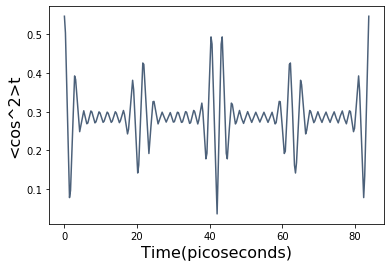

In [16]:
N2spin = Table().with_columns("Time(picoseconds)",timespin*10e12,"<cos^2>t",np.real(totalspin)).plot(0)